w的L2范数是: 0.13212549686431885


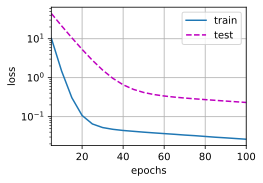

In [5]:
# %matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l
import numpy as np

n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5

true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)

test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)


def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.ones(1, requires_grad=True)
    return [w, b]


def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2


def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', \
                            yscale='log', xlim=[5, num_epochs], \
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr=lr, batch_size=batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, \
                         (d2l.evaluate_loss(net, train_iter, loss), \
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是:', torch.norm(w).item())


train(lambd=6)
